In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint, solve_ivp

1. Consider the velocity field given by:

$${u} \ = \ \frac{((x^2 - y^2 - 1)(x^2 - y^2) + 4x^2y^2)}{r^4}$$

$$v=\frac{−2xy}{r^4}$$

$$r = \sqrt{x^2 + y^2}$$

Further, set    $u \, \ v$ be set to zero when $r<1$.

Plot the velocity field using lines with arrows. Plot the streamlines. Also plot path lines and streaklines for 10 points that start from the line $x = -2$.

What does this flow look like to you?

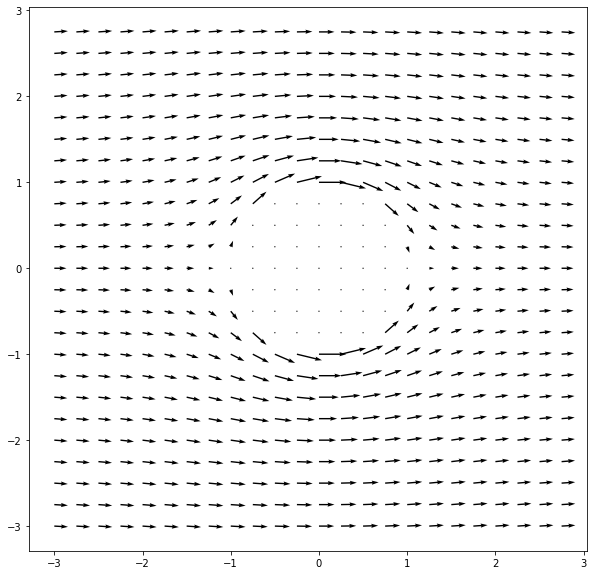

In [2]:
# Velocity Field:
r = np.meshgrid(np.arange(-3, 3, 0.25), np.arange(-3, 3, 0.25))
x, y = r
u, v = np.zeros_like(r)
for i in range(len(x)):
    for j in range(len(x[0])):
        if (np.sqrt(x[i][j]**2 + y[i][j]**2) >= 1):
            u[i][j] = ((x[i][j]**2 - y[i][j]**2 - 1)*(x[i][j]**2 - y[i][j]**2) + 4*(x[i][j]**2)*(y[i][j])**2)/(x[i][j]**2 + y[i][j]**2)**2
            v[i][j] = (-2*x[i][j]*y[i][j])/(x[i][j]**2 + y[i][j]**2)**2
        else:
            u[i][j] = 0
            v[i][j] = 0
plt.figure(figsize = (10, 10))
plt.quiver(x, y, u, v);

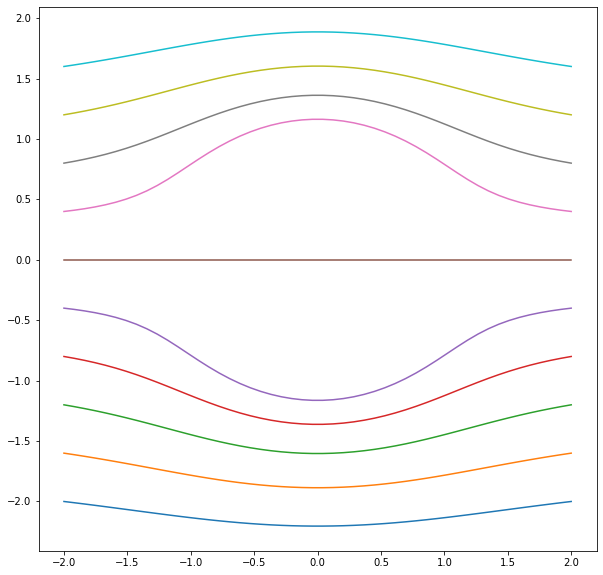

In [3]:
# Streamlines, Pathlines, Streaklines (Steady Flow Properties):
def dydx1(y, x):
    if (x**2 + y**2 >= 1):
        u = ((x**2 - y**2 - 1)*(x**2 - y**2) + 4*(x**2)*(y**2))/(x**2 + y**2)**2
        v = (-2*x*y)/(x**2 + y**2)**2
        dif = v/u
    else:
        u, v = 0, 0
        dif = 0
    return dif
    
ic1 = -2
plt.figure(figsize = (10, 10))
for i in range(10):
    sol = odeint(dydx1, ic1+i*0.4, np.linspace(-2, 2, 50))
    plt.plot(np.linspace(-2, 2, 50), sol)

2. Now consider the velocity field given by:

$${u} \ = \ \frac{-(x'^2 - y^2)}{r^4}$$

$$v \ = \ \frac{−2x′y}{r^4} $$

$$r \ = \ \sqrt{x′^2+y^2}$$

$$x′ \ = \ (x+t)$$

Note that this is a function of time. Plot the velocity field as before at some chosen times. Compute the pathlines and streaklines for points along the line $x=-2$ at $t=0$, and integrate this system for a total time of 5-6 seconds.

Also, plot the streamlines at a few different times.

What does this flow look like?

In [4]:
# Velocity Field:
def velocity_field(t):
    r = np.meshgrid(np.arange(-3, 3, 0.25), np.arange(-3, 3, 0.25))
    x, y = r
    
    u, v = np.zeros_like(r)
    for i in range(len(x)):
        for j in range(len(x[0])):
            if (np.sqrt((x[i][j] + t)**2 + y[i][j]**2) >= 0.1):
                u[i][j] = ((y[i][j]**2) - (x[i][j] + t)**2)/((x[i][j] + t)**2 + y[i][j]**2)**2
                v[i][j] = -2*(x[i][j] + t)*(y[i][j])/((x[i][j] + t)**2 + y[i][j]**2)**2
            else:
                u[i][j], v[i][j] = 0, 0
    plt.figure(figsize = (10, 10))
    plt.quiver(x, y, u, v)
interact(velocity_field, t = (0, 10, 1));

interactive(children=(IntSlider(value=5, description='t', max=10), Output()), _dom_classes=('widget-interact',…

In [5]:
# Streamlines at any time t (Using odeint):
def streamlines_ode(t):
    def dydx2(y, x):
        u = ((y**2) - (x + t)**2)/((x + t)**2 + y**2)**2
        v = -2*(x + t)*(y)/((x + t)**2 + y**2)**2
        diff = v/u
        return diff
    ic1 = -2
    plt.figure(figsize = (10, 10))
    for i in range(10):
        sol = odeint(dydx2, ic1+i*0.4, np.linspace(-2, 2, 10))
        plt.plot(np.linspace(-2, 2, 10), sol)
interact(streamlines_ode, t = (0, 15, 1))

interactive(children=(IntSlider(value=7, description='t', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.streamlines_ode(t)>

In [6]:
# Streamlines at any time t (Using solve_ivp):
def streamlines_solve(t):
    def dydx2(x, y):
        u = ((y**2) - (x + t)**2)/((x + t)**2 + y**2)**2
        v = -2*(x + t)*(y)/((x + t)**2 + y**2)**2
        diff = v/u
        
        return diff
    ic1 = -2
    plt.figure(figsize = (10, 10))
    for i in range(10):
        sol = solve_ivp(dydx2, [-2, 2], [ic1+i*0.4], t_eval = np.linspace(-2, 2, 50))
        plt.plot(np.linspace(-2, 2, 50), sol.y.T)
interact(streamlines_solve, t = (0, 15, 1));

interactive(children=(IntSlider(value=7, description='t', max=15), Output()), _dom_classes=('widget-interact',…

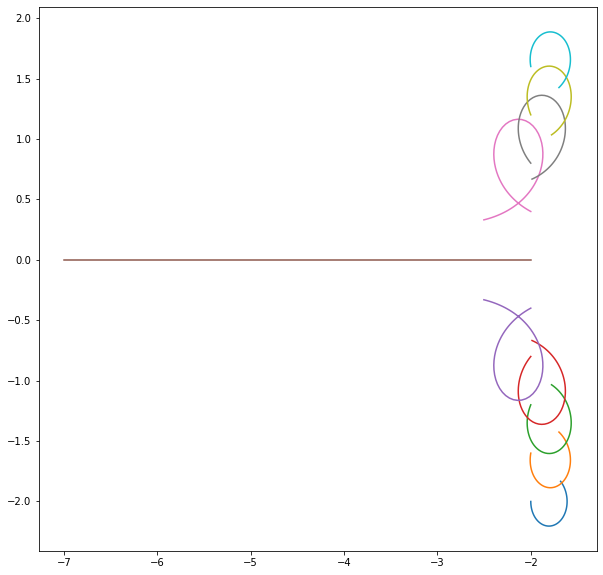

In [7]:
# Pathlines:
def vel(r : [], t):
    x, y = r
    if (np.sqrt((x + t)**2 + y**2) >= 0.01):
        u = ((y**2) - (x + t)**2)/((x + t)**2 + y**2)**2
        v = -2*(x + t)*(y)/((x + t)**2 + y**2)**2
    else:
        u, v = 0, 0
    return u, v
plt.figure(figsize = (10, 10))
for i in range(10):
    sol = odeint(vel, [-2, -2+i*0.4], np.linspace(0, 6, 100))
    x, y = sol.T
    plt.plot(x, y)

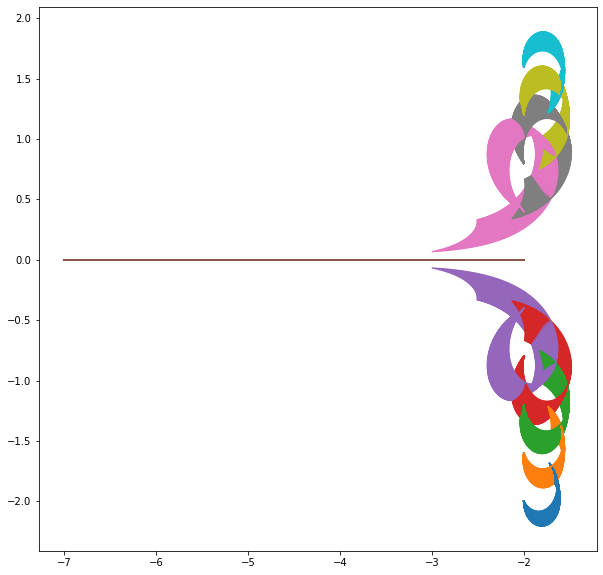

In [8]:
# Streaklines:
plt.figure(figsize = (10, 10))
for i in range(100):
    for j in range(10):
        sol = odeint(vel, [-2, -2+j*0.4], np.linspace(i*0.01, 6, 100))
        plt.plot(sol.T[0], sol.T[1])